In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,10) 
pd.options.display.max_columns = None

In [2]:
df= pd.read_pickle('datos/cars_price_norm_est_cod.pkl')
df.head(2)

,Levy,Prod_year,Mileage,Cylinders,Airbags,Price_log,Leather_interior_le,Fuel_type_CNG,Fuel_type_Diesel,Fuel_type_Hybrid,Fuel_type_Hydrogen,Fuel_type_LPG,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Gear_box_type_Automatic,Gear_box_type_Manual,Gear_box_type_Tiptronic,Gear_box_type_Variator,Drive_wheels_4x4,Drive_wheels_Front,Drive_wheels_Rear,Category_Cabriolet,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,1.766963,-0.411248,0.237134,1.375313,1.329406,9.497622,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.943936,-0.173337,0.273438,1.375313,0.319668,9.718422,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


##### <font color=green>  El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:
##### <font color=green> Deberéis separar la X y la y.
##### <font color=green> Deberéis crear el train y el test.
##### <font color=green> Ajustar vuestro modelo.

In [3]:
df.dtypes

Levy                        float64
Prod_year                   float64
Mileage                     float64
Cylinders                   float64
Airbags                     float64
Price_log                   float64
Leather_interior_le           int32
Fuel_type_CNG                 int32
Fuel_type_Diesel              int32
Fuel_type_Hybrid              int32
Fuel_type_Hydrogen            int32
Fuel_type_LPG                 int32
Fuel_type_Petrol              int32
Fuel_type_Plug-in Hybrid      int32
Gear_box_type_Automatic       int32
Gear_box_type_Manual          int32
Gear_box_type_Tiptronic       int32
Gear_box_type_Variator        int32
Drive_wheels_4x4              int32
Drive_wheels_Front            int32
Drive_wheels_Rear             int32
Category_Cabriolet            int32
Category_Coupe                int32
Category_Goods wagon          int32
Category_Hatchback            int32
Category_Jeep                 int32
Category_Limousine            int32
Category_Microbus           

Chequeamos nuevamente que no haya ningún valor nulo.

In [4]:
df.isnull().sum()

Levy                        0
Prod_year                   0
Mileage                     0
Cylinders                   0
Airbags                     0
Price_log                   0
Leather_interior_le         0
Fuel_type_CNG               0
Fuel_type_Diesel            0
Fuel_type_Hybrid            0
Fuel_type_Hydrogen          0
Fuel_type_LPG               0
Fuel_type_Petrol            0
Fuel_type_Plug-in Hybrid    0
Gear_box_type_Automatic     0
Gear_box_type_Manual        0
Gear_box_type_Tiptronic     0
Gear_box_type_Variator      0
Drive_wheels_4x4            0
Drive_wheels_Front          0
Drive_wheels_Rear           0
Category_Cabriolet          0
Category_Coupe              0
Category_Goods wagon        0
Category_Hatchback          0
Category_Jeep               0
Category_Limousine          0
Category_Microbus           0
Category_Minivan            0
Category_Pickup             0
Category_Sedan              0
Category_Universal          0
dtype: int64

Dentro de los datos de test eliminaremos la columna price_box que es nuestra columna respuesta.

Lo primero que haremos será separar los datos en X e y. Dentro de los datos de test eliminaremos la columna price_log que es nuestra columna respuesta.

In [5]:
X = df.drop(["Price_log"],  axis = 1)
y = df["Price_log"] 

X serán nuestras variables predictoras.

In [6]:
X.head(2)

,Levy,Prod_year,Mileage,Cylinders,Airbags,Leather_interior_le,Fuel_type_CNG,Fuel_type_Diesel,Fuel_type_Hybrid,Fuel_type_Hydrogen,Fuel_type_LPG,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Gear_box_type_Automatic,Gear_box_type_Manual,Gear_box_type_Tiptronic,Gear_box_type_Variator,Drive_wheels_4x4,Drive_wheels_Front,Drive_wheels_Rear,Category_Cabriolet,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,1.766963,-0.411248,0.237134,1.375313,1.329406,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.943936,-0.173337,0.273438,1.375313,0.319668,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


y será nuestra variable respuesta, es decir, el precio de los coches.

In [7]:
y.head(2)

0    9.497622
1    9.718422
Name: Price_log, dtype: float64

Vamos a dividir nuestros datos en conjunto de entrenamiento y test.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos que usaremos de nuestro ordenador. Al indicar -1 significa que los usaremos todos. 

lr = LinearRegression(n_jobs=-1)

In [10]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo. Fijaros que para que aprenda, les paso solo los datos de entrenamiento

lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [11]:
x_train.shape

(7901, 31)

In [12]:
x_test.shape

(1976, 31)

In [13]:
y_train.shape

(7901,)

In [14]:
y_test.shape

(1976,)

In [15]:
# es el momento de hacer las predicciones, para eso usaremos el método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para los coches que tenemos en los datos de entrenamiento
y_predict_test = lr.predict(x_test) # hacemos las predicciones para los coches que tenemos en los datos de test

In [16]:
y_predict_train.shape

(7901,)

In [17]:
y_predict_test.shape

(1976,)

In [18]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
13506,7.619724,9.199463,Train
1284,9.404508,9.326050,Train
278,10.816934,10.130859,Train
12539,9.303466,9.416870,Train
7494,10.810738,10.117676,Train


In [19]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
13506,7.619724,9.199463,Train,-1.579739
1284,9.404508,9.326050,Train,0.078458
278,10.816934,10.130859,Train,0.686075
12539,9.303466,9.416870,Train,-0.113404
7494,10.810738,10.117676,Train,0.693062


In [20]:
resultados.shape

(9877, 4)

In [21]:
resultados.Set.unique()

array(['Train', 'Test'], dtype=object)

In [22]:
resultados.describe().T

,count,mean,std,min,25%,50%,75%,max
Real,9877.0,9.557538e+00,9.947122e-01,6.308098e+00,9.182147,9.699411,10.130185,1.264079e+01
Predicted,9877.0,5.244363e+07,5.212010e+09,8.471313e+00,9.209839,9.451538,9.891846,5.179857e+11
residuos,9877.0,-5.244362e+07,5.212010e+09,-5.179857e+11,-0.354171,0.112604,0.546149,3.230880e+00


In [23]:
resultados

,Real,Predicted,Set,residuos
13506,7.619724,9.199463,Train,-1.579739
1284,9.404508,9.326050,Train,0.078458
278,10.816934,10.130859,Train,0.686075
12539,9.303466,9.416870,Train,-0.113404
7494,10.810738,10.117676,Train,0.693062
...,...,...,...,...
12837,10.484361,10.095215,Test,0.389147
6717,8.679822,9.217285,Test,-0.537463
8534,9.436998,9.195190,Test,0.241807
11366,10.258782,10.121826,Test,0.136955


Hemos detectado tarde que tenemos un valor muy alto y por eso vamos a hacer un filtrado para qyue descarte ese valor.

In [24]:
resultados['Predicted'].max()

517985666328.53577

In [25]:
resultados2 = resultados[resultados['Predicted'] < resultados['Predicted'].max()]

In [26]:
resultados2.head()

,Real,Predicted,Set,residuos
13506,7.619724,9.199463,Train,-1.579739
1284,9.404508,9.326050,Train,0.078458
278,10.816934,10.130859,Train,0.686075
12539,9.303466,9.416870,Train,-0.113404
7494,10.810738,10.117676,Train,0.693062


> Los residuos (o errores) son la diferencia entre los valores observados y los valores que predice el modelo:

Vemos que tenemos residuos negativos, por lo tanto, el valor observado de Y es menor que su valor estimado y por lo tanto se sobreestima la variable Y, en nuestro caso el precio de las coches

Observando los residuos, podemos decir que tenemos tanto sobreestimado como infraestimado. Vamos a verlo graficamente

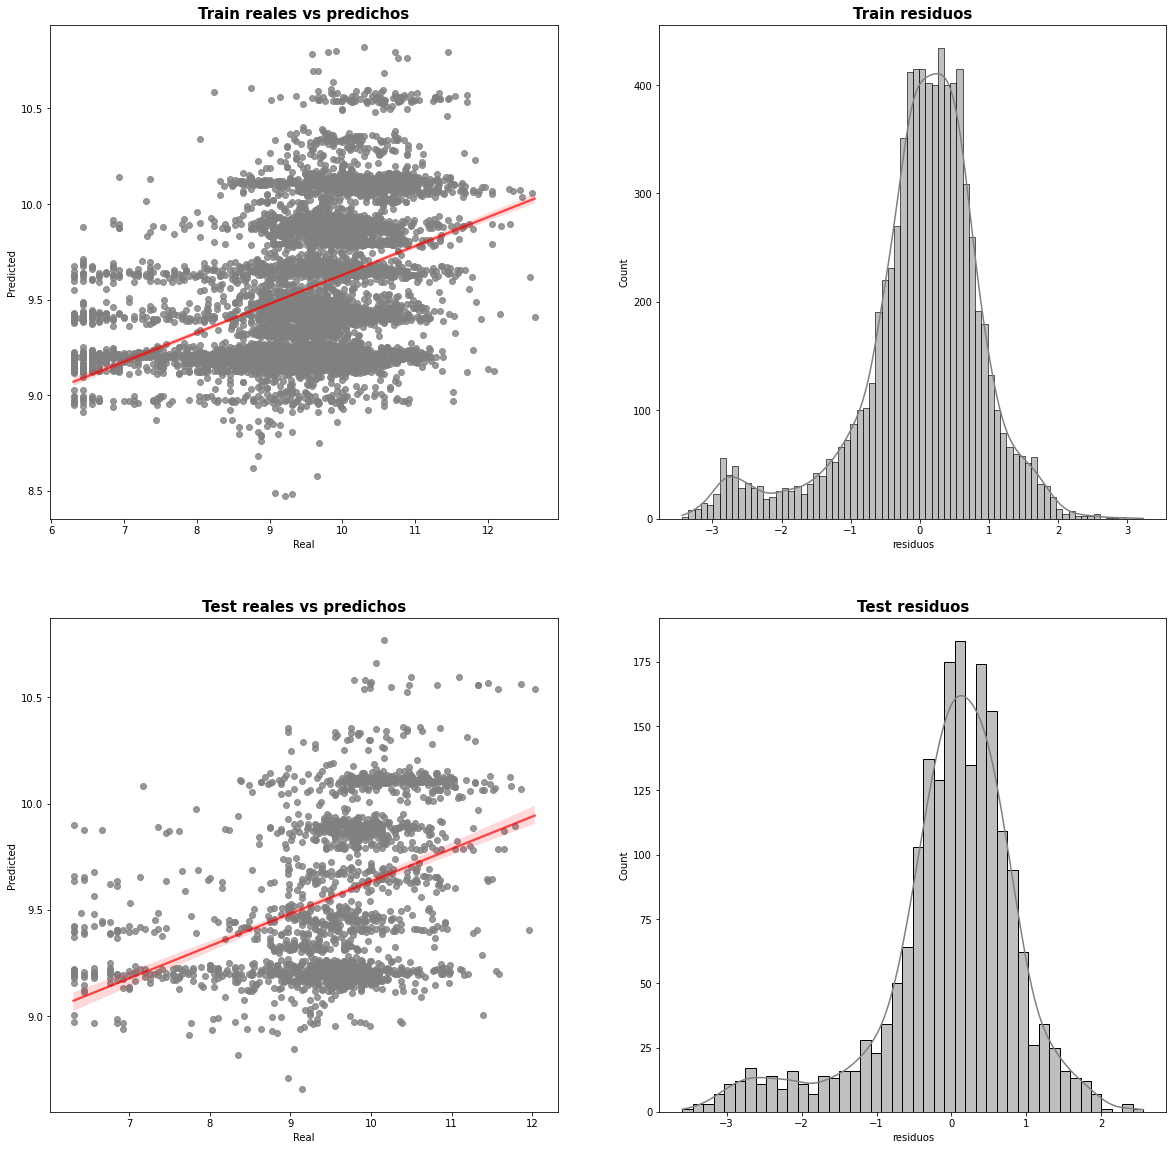

In [27]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados2[resultados2['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados2[resultados2['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados2[resultados2['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados2[resultados2['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");


Con el análisis de los resultados crremos que el modelo está sobreajustado, ya que los resultados reales son prácticamente iguales a los predichos. Por lo tanto nuestro modelo es incapaz de hacer buenas predicciones cuando le entren nuevos datos porque se los ha aprendido de memoria.

Los próximos pasos es hacer comparaciones con las métricas correspondientes.